# Validation Study 

we have 8 sensors 0-7, but sensor 1 is not connected, ie to tal of seven sensor data with sensor 1 being dead

In [1]:
%matplotlib inline


In [2]:
import os
import pandas as pd
from pandas import DataFrame
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
#import seaborn as sns

### READING DATA and Cleaning it 

In [84]:
def cleaning_df(DF):
    # dropping columns with no value
    #DF = DF.dropna(axis =1) 
    # dropping wave id column
    DF = DF.drop(columns = 2, axis =1)
    # name the first sensor columns 
    cols_0={0: "Time", 1: "FrameID", 3: "SensorID", 4: "Sensor_1Status", 5: "X_Nose", 6: "Y_Nose", 7:"Z_Nose"}
    DF = DF.rename(columns=cols_0, errors="raise")
    DF = DF.drop(columns = [8,9,10, 11], axis =1)
    
    DF = DF.drop(columns = [12,13,14,15,16,17,18,19,20], axis =1)
    cols_1={21: "SensorID", 22: "Sensor_2Status", 23: "X_LLeft", 24: "Y_LLeft", 25:"Z_LLeft"}
    DF = DF.rename(columns=cols_1, errors="raise")
    
    DF = DF.drop(columns = [26,27,28,29], axis =1)
    cols_2={30: "SensorID", 31: "Sensor_3Status", 32: "X_LR", 33: "Y_LR", 34:"Z_LR"}
    DF = DF.rename(columns=cols_2, errors="raise")
    
    DF = DF.drop(columns = [35,36,37,38], axis =1)
    cols_3={39: "SensorID", 40: "Sensor_4Status", 41: "X_UL", 42: "Y_UL", 43:"Z_UL"}
    DF = DF.rename(columns=cols_3, errors="raise")
    
    DF = DF.drop(columns = [44,44,46,47], axis =1)
    cols_4={48: "SensorID", 49: "Sensor_5Status", 50: "X_LL", 51: "Y_LL", 52:"Z_LL"}
    DF = DF.rename(columns=cols_4, errors="raise")
    
    DF = DF.drop(columns = [53,54,55,56], axis =1)
    cols_5={57: "SensorID", 58: "Sensor_6Status", 59: "X_JR", 60: "Y_JR", 61:"Z_JR"}
    DF = DF.rename(columns=cols_5, errors="raise")
    
    DF = DF.drop(columns = [62,63,64,65], axis =1)
    cols_6={66: "SensorID", 67: "Senson_7Status", 68: "X_JL", 69: "Y_JL", 70:"Z_JL"}
    DF = DF.rename(columns=cols_6, errors="raise")
    DF = DF.drop(columns = [71,72,73,74], axis =1)
    return DF

In [98]:
path = os.getcwd()+"\RM_3_20191101\WAVE\RM_3_20191101"
Files = os.listdir(path)           
ext=('.tsv')
Files = [i for i in Files if i.endswith(ext)]

Tasks = ['REST', 'OPEN', 'SPREAD', 'OOEE', 'PA', 'BBP', 'TNG_PROTRUSION', 'TNG_LAT', 'TNG_NOSE']
Conditions = ['FAST', 'SLOW', 'DISOR', 'HOLD']

TASK_DFS_LIST = list()
for i in range(0, len(Files)):
    if Tasks[1] in Files[i]:
        df = pd.read_csv(path+ "\\" + Files[i], delimiter='\t', skiprows=1,header=None)
        df = cleaning_df(df)
        df['PatientID'] = Files[i][:4]
        df['DataDATE'] = Files[i][5:13]
        for condition in Conditions:
            if condition in Files[i]:
                df['Condition'] = condition
            else:
                df['Condition'] = 'NORMAL'
        TASK_DFS_LIST.append(df)
    else:
        pass 
        
        

In [99]:
path+ "\\" + Files[i]

'C:\\Users\\jafarid\\Documents\\Code\\ValidationStudy\\RM_3_20191101\\WAVE\\RM_3_20191101\\RM_3_20191101_2_039_TNG_NOSE_FAST_1.tsv'

In [101]:
len(TASK_DFS_LIST)


8

In [17]:
# reading data into dataframes 


REST_DF_0 = pd.read_csv(path + "\RM_3_20191101_001_REST.tsv", delimiter='\t', skiprows=1,header=None)
REST_DF_1 = pd.read_csv(path + "\RM_3_20191101_002_REST_1.tsv", delimiter='\t', skiprows=1,header=None)

OPEN_DF_HOL_0 = pd.read_csv(path +"\RM_3_20191101_003_OPEN_HOLD.tsv", delimiter='\t', skiprows=1,header=None)
OPEN_DF_HOL_1 = pd.read_csv(path +"\RM_3_20191101_004_OPEN_HOLD_1.tsv", delimiter='\t', skiprows=1,header=None)
#BIGSMILE_DF = pd.read_csv('RM_1_20190913_004_BIGSMILE.tsv', delimiter='\t', skiprows=1,header=None)

In [19]:
REST_DF_0 = cleaning_df(REST_DF_0)
REST_DF_1 = cleaning_df(REST_DF_1)

OPEN_DF_HOL_0 = cleaning_df(OPEN_DF_HOL_0)
OPEN_DF_HOL_1 = cleaning_df(OPEN_DF_HOL_1)

#BIGSMILE_DF = cleaning_df(BIGSMILE_DF)

### RANGE OF MOTION ANALYSIS

In [20]:
def LipEdgeDist(DF):
    DF['Horiz_Lip_Motion'] = DF.apply(lambda row: math.sqrt((row.X_LLeft - row.X_LR)**2 + (row.Y_LLeft - row.Y_LR)**2
                                                                  + (row.Z_LLeft - row.Z_LR)**2), axis = 1) 
    DF['Vert_Lip_Motion'] = DF.apply(lambda row: math.sqrt((row.X_UL - row.X_LL)**2 + (row.Y_UL - row.Y_LL)**2 +
                                                                 (row.Z_UL - row.Z_LL)**2), axis = 1) 
    return DF

In [21]:
# Activity 1
REST_DF_0 = LipEdgeDist(REST_DF_0)
REST_DF_1 = LipEdgeDist(REST_DF_1)

# Activity 2
OPEN_DF_HOL_0 = LipEdgeDist(OPEN_DF_HOL_0)
OPEN_DF_HOL_1 = LipEdgeDist(OPEN_DF_HOL_1)

#BIGSMILE_DF = LipEdgeDist(BIGSMILE_DF)

Plotting the horizontal and vertical distances 

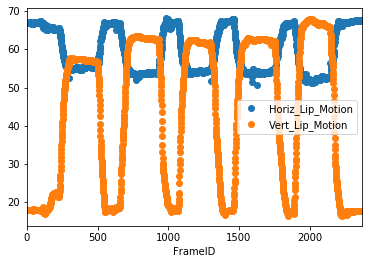

In [22]:
OPEN_DF_HOL_1.plot(x='FrameID', y=['Horiz_Lip_Motion', 'Vert_Lip_Motion'], style='o')

### Kinematic Analysis

finding the average speed, number describe would be used to find the min and max, 

In [74]:
OPEN_DF_HOL_1["Speed"] = np.gradient(OPEN_DF_HOL_1['Vert_Lip_Motion'], OPEN_DF_HOL_1["Time"])

OPEN_ARRAY_HOL_1_SPEED = OPEN_DF_HOL_1["Speed"].values


# set the noise at rest to be zero 
threshold = 5 #mm**2/sec

super_threshold_indices = abs(OPEN_ARRAY_HOL_1_SPEED) < threshold
OPEN_ARRAY_HOL_1_SPEED[super_threshold_indices] = 0

cycles = np.split(OPEN_ARRAY_HOL_1_SPEED, np.where(OPEN_ARRAY_HOL_1_SPEED[:-1] == 0)[0]+1)
cycles = [array for array in cycles if len(array) >3]
print(len(cycles))
print(cycles)

54
[array([-5.138504  , 19.95452647, 14.96780975,  0.        ]), array([ 10.35720275, -11.95389488, -13.37078535,   0.        ]), array([ 51.9195212 ,   5.46802912, -42.33515139,  12.30974778,
       -15.63271626, -15.39301842,   0.        ]), array([ -9.91883068, -10.11860673,  -5.86286599,  17.60201444,
       -11.62771477, -35.4118504 , -10.57321126,   0.        ]), array([  6.15882912,  41.88737467,  31.96827142, -11.60603817,
        -9.2629255 ,  15.08045395,   0.        ]), array([-6.74402791, -6.65169827,  7.11999548, 26.40822269,  0.        ]), array([  6.48891369, -25.40264718,  -8.74901167,  27.09498333,
        14.64969898,  10.099033  ,  11.07202982,  -5.82778538,
         0.        ]), array([  9.33395169,  12.01640754,  17.34478151,  14.19301687,
        12.67400837,   5.91331805,  11.59332345,  18.32139274,
        18.90164758,  18.30350255,  17.90068768, -10.16710006,
        16.70408514,  53.41481886,  16.74355022,  39.33701717,
        42.60102493,   0.        ]), ar

In [56]:
np.where(abs(OPEN_ARRAY_HOL_1_SPEED[:-1]) > 0)


(array([  45,   46,   47, ..., 2278, 2280, 2282], dtype=int64),)

In [58]:
np.where(abs(OPEN_ARRAY_HOL_1_SPEED[:-1]) == 0)[0]+1

array([   1,    2,    3, ..., 2365, 2366, 2367], dtype=int64)

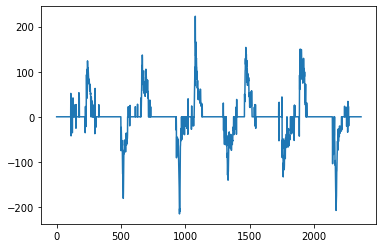

In [38]:
plt.plot(OPEN_ARRAY_HOL_1_SPEED)

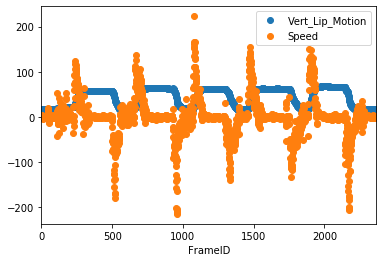

In [14]:
OPEN_DF_HOL_1.plot(x='FrameID', y=['Vert_Lip_Motion', "Speed"], style='o')

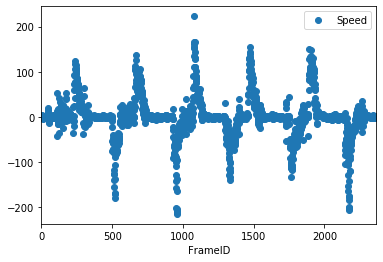

In [16]:
OPEN_DF_HOL_1.plot(x='FrameID', y=[ "Speed"], style='o')

### SYMMETRY ANALYSIS

We do this, by defining right and left triangles from the right and left corner sensors to the top and bottom 

In [10]:

def triangleArea(DF):
    # the choices are LLEFT, LR, LL, LU in string format
    DF["DownToLeft"] = DF.apply(lambda row: math.sqrt((row.X_LLeft - row.X_LL)**2 + (row.Y_LLeft - row.Y_LL)**2
                                                                      + (row.Z_LLeft - row.Z_LL)**2), axis = 1)
    
    DF["UpToLeft"] = DF.apply(lambda row: math.sqrt((row.X_LLeft - row.X_UL)**2 + (row.Y_LLeft - row.Y_UL)**2
                                                                      + (row.Z_LLeft - row.Z_UL)**2), axis = 1)
    
    DF["DownToRight"] = DF.apply(lambda row: math.sqrt((row.X_LR - row.X_LL)**2 + (row.Y_LR - row.Y_LL)**2 +
                                                                 (row.Z_LR - row.Z_LL)**2), axis = 1) 
    
    DF["UpToRight"] = DF.apply(lambda row: math.sqrt((row.X_LR - row.X_UL)**2 + (row.Y_LR - row.Y_UL)**2 +
                                                                 (row.Z_LR - row.Z_UL)**2), axis = 1) 
    
    DF["HP_L"] = DF.apply(lambda row: ((row.DownToLeft + row.UpToLeft + row.Vert_Lip_Motion)/2), axis = 1)
        
    DF["HP_R"] = DF.apply(lambda row: ((row.DownToRight + row.UpToRight + row.Vert_Lip_Motion)/2), axis = 1)
    
    
    DF["Area_Left"] = DF.apply(lambda row:  math.sqrt(row.HP_L*(row.HP_L - row.DownToLeft)*(row.HP_L - row.UpToLeft)*
                                                     (row.HP_L - row.Vert_Lip_Motion)), axis = 1)
    
    DF["Area_Right"] = DF.apply(lambda row:  math.sqrt(row.HP_R*(row.HP_R - row.DownToRight)*(row.HP_R - row.UpToRight)*
                                                     (row.HP_R - row.Vert_Lip_Motion)), axis = 1)
    
    DF["Area_Ratio"] = DF.apply(lambda row: row.Area_Left/row.Area_Right, axis = 1)
    
    
    return DF
    
    

In [11]:
OPEN_DF_HOL_1 = triangleArea(OPEN_DF_HOL_1)

### Displaying the results 

In [22]:
OPEN_DF_HOL_1[["Time",'Vert_Lip_Motion','Horiz_Lip_Motion', "Area_Left", "Area_Right", "Area_Ratio", "Speed"]].describe()

,Time,Vert_Lip_Motion,Horiz_Lip_Motion,Area_Left,Area_Right,Area_Ratio,Speed
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,11.860220,43.217148,59.506669,672.580285,698.306647,0.966469,-0.003070
std,6.831923,20.078110,5.930171,276.308438,291.903112,0.024118,41.024020
min,0.034500,16.380783,50.642003,284.459923,297.371783,0.872163,-215.508653
25%,5.947325,18.462483,54.058103,322.366181,335.221885,0.950144,-3.650269
50%,11.860200,53.924261,56.543906,847.630151,865.743620,0.966926,-0.228898
75%,17.773100,62.366004,66.344169,929.820737,973.107571,0.982103,3.494882
max,23.686000,67.896916,68.151060,1031.436275,1050.501083,1.061095,223.097765


In [13]:
REST_DF.plot(x='Time', y='Vert_Lip_Motion', style='o')

NameError: name 'REST_DF' is not defined

In [ ]:
BIGSMILE_DF.plot(x='FrameID', y='Horiz_Lip_Motion', style='o')

In [ ]:
OPEN_DF_0.plot(x='FrameID', y='Horiz_Lip_Motion', style='o')

In [ ]:
OPEN_DF_1.plot(x='FrameID', y='Horiz_Lip_Motion', style='o')

In [ ]:
OPEN_DF_0.plot(x='Time', y=['Vert_Lip_Motion','Horiz_Lip_Motion'] , style='o')
x = 2
plt.savefig('%d'%x)

In [ ]:
OPEN_DF_1.plot(x='Time', y='Vert_Lip_Motion', style='o')
x = 2
plt.savefig('%d'%x)

In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for frame in range(OPEN_DF.shape[0]):
    ax.clear()
    data=OPEN_DF.iloc[[frame]]
    ax.scatter(data["X_LLeft"],data["Y_LLeft"], data["Z_LLeft"], color="r", label="Left Lip")
    ax.scatter(data["X_LR"],data["Y_LR"], data["Z_LR"], color="g", label="Right Lip")
    ax.scatter(data["X_UL"],data["Y_UL"], data["Z_UL"], color="b", label="Upper Lip")
    ax.scatter(data["X_LL"],data["Y_LL"], data["Z_LL"], color="b", label="Lower Lip")
    plt.savefig('fig_results/%d.png'%frame, bbox_inches='tight')

    

In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


def connectpoints(DF_data, p1_sensor="",p2_sensor=""):
    # the choices are LLEFT, LR, LL, LU in string format
    x1 = data.iloc[0]["X_%s"%p1_sensor]
    y1 = data.iloc[0]["Y_%s"%p1_sensor]
    z1 = data.iloc[0]["Z_%s"%p1_sensor]

    x2 = data.iloc[0]["X_%s"%p2_sensor]
    y2 = data.iloc[0]["Y_%s"%p2_sensor]
    z2 = data.iloc[0]["Z_%s"%p2_sensor]

    plt.plot([x1,x2],[y1,y2],[z1,z2],'k-')


def plotFrameGenerator(DF):
    # GENERATE MOVIE OF THE SENSOR MOVEMENTS 
    for frame in range(DF.shape[0]):
        ax.clear()
        data=DF.iloc[[frame]]
        ax.scatter(data["X_LLeft"],data["Y_LLeft"], data["Z_LLeft"], color="b", label="Left Lip")
        ax.scatter(data["X_LR"],data["Y_LR"], data["Z_LR"], color="g",label="Right Lip")
        ax.scatter(data["X_UL"],data["Y_UL"], data["Z_UL"], color="r",label="Upper Lip")
        ax.scatter(data["X_LL"],data["Y_LL"], data["Z_LL"], color="black",label="Lower Lip")


        connectpoints(data, "LLeft", "UL")
        connectpoints(data, "LLeft", "LL")
        connectpoints(data, p1_sensor="LR", p2_sensor="UL")
        connectpoints(data, p1_sensor="LR", p2_sensor="LL")
        #connectpoints(data, p1_sensor="UL", p2_sensor="LL")
        connectpoints(data, p1_sensor="LLeft", p2_sensor="LR")

        ax.set_xlim(-40, 40)
        ax.set_ylim(-90, -30)
        ax.set_zlim(-290, -200)

        ax.view_init(elev=-90, azim=-30)
        plt.savefig('fig_results/%d.png'%frame, bbox_inches='tight')


In [ ]:
plotFrameGenerator(OPEN_DF_HOL_1)

In [ ]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

def connectpoints(DF_data, p1_sensor="",p2_sensor=""):
    # the choices are LLEFT, LR, LL, LU in string format
    x1 = data.iloc[0]["X_%s"%p1_sensor]
    y1 = data.iloc[0]["Y_%s"%p1_sensor]
    z1 = data.iloc[0]["Z_%s"%p1_sensor]

    x2 = data.iloc[0]["X_%s"%p2_sensor]
    y2 = data.iloc[0]["Y_%s"%p2_sensor]
    z2 = data.iloc[0]["Z_%s"%p2_sensor]

    plt.plot([x1,x2],[y1,y2],[z1,z2],'k-')
    
data=OPEN_DF.iloc[[1000]]
ax.scatter(data["X_LLeft"],data["Y_LLeft"], data["Z_LLeft"], color="b", label="Left Lip")
ax.scatter(data["X_LR"],data["Y_LR"], data["Z_LR"], color="g",label="Right Lip")
ax.scatter(data["X_UL"],data["Y_UL"], data["Z_UL"], color="r",label="Upper Lip")
ax.scatter(data["X_LL"],data["Y_LL"], data["Z_LL"], color="black",label="Lower Lip")


connectpoints(data, "LLeft", "UL")
connectpoints(data, "LLeft", "LL")
connectpoints(data, p1_sensor="LR", p2_sensor="UL")
connectpoints(data, p1_sensor="LR", p2_sensor="LL")
#connectpoints(data, p1_sensor="UL", p2_sensor="LL")
connectpoints(data, p1_sensor="LLeft", p2_sensor="LR")

ax.set_xlim(-40, 40)
ax.set_ylim(-90, -30)
ax.set_zlim(-290, -200)
print (ax.azim)
ax.view_init(elev=-90, azim=-30)

In [ ]:
OPEN_DF[["Time", "X_LLeft","Y_LLeft","Z_LLeft", "X_LR","Y_LR","Z_LR","X_UL", "Y_UL", "Z_UL","X_LL","Y_LL","Z_LL"]].describe()




### SAVE RESULT INTO RESULT DF

In [ ]:
RESULT_DF = 


# WRITE THE DATA TO A SCV FILE 

#header = ["Time", 'Horiz_Lip_Motion', 'Vert_Lip_Motion']
#OPEN_DF.to_csv('open_sensor_results.csv', columns = header)

In [ ]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


def connectpoints(DF_data, p1_sensor="",p2_sensor=""):
    # the choices are LLEFT, LR, LL, LU in string format
    x1 = data.iloc[0]["X_%s"%p1_sensor]
    y1 = data.iloc[0]["Y_%s"%p1_sensor]
    z1 = data.iloc[0]["Z_%s"%p1_sensor]

    x2 = data.iloc[0]["X_%s"%p2_sensor]
    y2 = data.iloc[0]["Y_%s"%p2_sensor]
    z2 = data.iloc[0]["Z_%s"%p2_sensor]

    plt.plot([x1,x2],[y1,y2],[z1,z2],'k-')




data=OPEN_DF.iloc[[frame]]
ax.scatter(data["X_LLeft"],data["Y_LLeft"], data["Z_LLeft"], color="b", label="Left Lip")
ax.scatter(data["X_LR"],data["Y_LR"], data["Z_LR"], color="g",label="Right Lip")
ax.scatter(data["X_UL"],data["Y_UL"], data["Z_UL"], color="r",label="Upper Lip")
ax.scatter(data["X_LL"],data["Y_LL"], data["Z_LL"], color="black",label="Lower Lip")


#connectpoints(data, "LLeft", "UL")
#connectpoints(data, "LLeft", "LL")
#connectpoints(data, p1_sensor="LR", p2_sensor="UL")
#connectpoints(data, p1_sensor="LR", p2_sensor="LL")
#connectpoints(data, p1_sensor="UL", p2_sensor="LL")
#connectpoints(data, p1_sensor="LLeft", p2_sensor="LR")
plt.show()

    

In [ ]:
# WRITE THE DATA TO A SCV FILE 

#header = ["Time", 'Horiz_Lip_Motion', 'Vert_Lip_Motion']
#OPEN_DF.to_csv('open_sensor_results.csv', columns = header)
#BIGSMILE_DF.to_csv('bigsmile_sensor_results.csv', columns = header)
#REST_DF.to_csv('rest_sensor_results.csv', columns = header)

In [ ]:
nfr = len(OPEN_DF) # Number of frames
fps = 10 # Frame per sec

xs = []
ys = []
zs = []
ss = np.arange(1,nfr,1)
for s in ss:
    xs.append(np.array((OPEN_DF.iloc[0]["X_UL"], OPEN_DF.iloc[0]["X_LL"], OPEN_DF.iloc[0]["X_LLeft"],OPEN_DF.iloc[0]["X_LR"])))
    ys.append(np.array((OPEN_DF.iloc[0]["X_UL"], OPEN_DF.iloc[0]["X_LL"], OPEN_DF.iloc[0]["X_LLeft"],OPEN_DF.iloc[0]["X_LR"])))
    zs.append(np.array((OPEN_DF.iloc[0]["X_UL"], OPEN_DF.iloc[0]["X_LL"], OPEN_DF.iloc[0]["X_LLeft"],OPEN_DF.iloc[0]["X_LR"])))
   


In [ ]:
%matplotlib notebook
%matplotlib notebook
fig =  plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=2)
def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps,  repeat=False, blit=False)
